## Exploration of consumption data

In [31]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Load the data

In [32]:
# Load the data from the CSV file
data = pd.read_csv('./consumption_no_outliers.csv')

# Normalize by population
for col in data.columns[5:]:
    data[col] = data[col]/data['Households']

#### Prepare data for analysis

### Data Exploration
We visualize the data with Principle Component Analysis (PCA) and Multidimensional Scaling (MDS) to search for natural preference clusters that may exist in the data

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

#### PCA Analysis

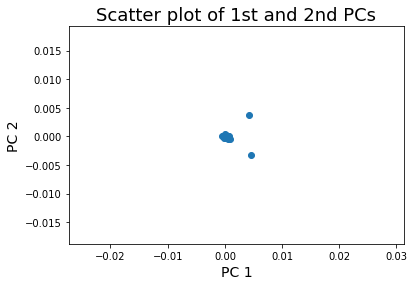

In [34]:
# Extract principle components (PC's)
pca = PCA()
z = pca.fit_transform(data.drop(columns=['District', 'Households', 'Median Income', 'Latitude', 'Longitude']))

# Plot data by first and second most influential PC's
plt.scatter(z[:,0],z[:,1])
plt.title("Scatter plot of 1st and 2nd PCs",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

*Discussion:*
At first glance, there does not appear to be any naturally occuring grouping in the data.

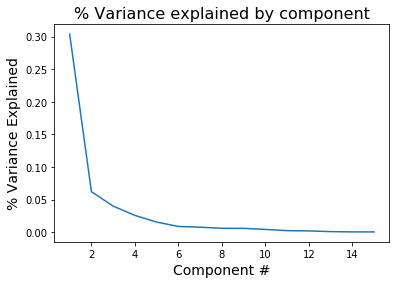

In [38]:
# Elbow plot of variance explained per component
plt.plot(np.arange(1,16),pca.explained_variance_ratio_[1:100])
plt.title("% Variance explained by component",size=16)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

*Discussion:* If there were naturally occuring grouping within the data, we would expext to see most variance to be captured by a small number of components. However, we see that it takes many PC's to explain variance in the dataset. This suggests that districts are not naturally "clustered" by their taste preferences.

#### MDS analysis

breaking at iteration 3 with stress 0.0001230768346546708
breaking at iteration 3 with stress 0.00014916193661021788
breaking at iteration 3 with stress 0.00012322600345563984
breaking at iteration 3 with stress 0.0001147410458112394


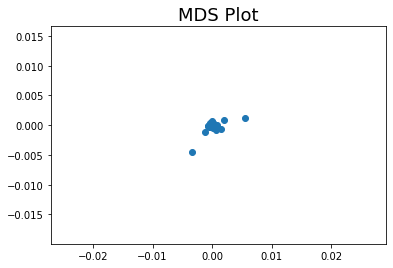

In [41]:
# Perform MDS
mds = MDS(n_components=2,verbose=1,eps=1e-2)
mds.fit(data.drop(columns=['District', 'Households', 'Median Income', 'Latitude', 'Longitude']))

# Plot MDS embeddings
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

*Discussion* There are no evident clusters in the MDS embeddings. This reaffirms that districts are not naturally clustered by taste preference, and that we need to construct them.